In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [6]:
df = pd.read_csv('titanic_cleand.csv')

In [7]:
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,1,0,0.827377,"Braund, Mr. Owen Harris",0,-0.565736,0.432793,-0.473674,1,-0.502445,False,False,True,0.0
1,2,1,-1.566107,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.663861,0.432793,-0.473674,1,0.786845,True,False,False,2.0
2,3,1,0.827377,"Heikkinen, Miss. Laina",1,-0.258337,-0.474545,-0.473674,1,-0.488854,False,False,True,1.0
3,4,1,-1.566107,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.433312,0.432793,-0.473674,2,0.420730,False,False,True,2.0
4,5,0,0.827377,"Allen, Mr. William Henry",0,0.433312,-0.474545,-0.473674,1,-0.486337,False,False,True,0.0


In [9]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Survived'])
y = df["Survived"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [10]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

In [11]:
def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(42)
    W1 = np.random.randn(hidden_size, input_size) * 0.01
    b1 = np.zeros((hidden_size, 1))
    W2 = np.random.randn(output_size, hidden_size) * 0.01
    b2 = np.zeros((output_size, 1))
    return W1, b1, W2, b2


In [12]:
def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    return A1, A2


In [13]:
def compute_cost(A2, Y):
    m = Y.shape[1]
    cost = -np.sum(Y * np.log(A2) + (1 - Y) * np.log(1 - A2)) / m
    return cost


In [14]:
def backward_propagation(X, Y, A1, A2, W2):
    m = X.shape[1]
    
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m

    dZ1 = np.dot(W2.T, dZ2) * sigmoid_derivative(A1)
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    return dW1, db1, dW2, db2


In [15]:
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2


In [16]:
def train(X, Y, hidden_size=4, iterations=1000, learning_rate=0.01):
    input_size = X.shape[0]
    output_size = 1
    
    W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)
    
    for i in range(iterations):
        A1, A2 = forward_propagation(X, W1, b1, W2, b2)
        cost = compute_cost(A2, Y)
        dW1, db1, dW2, db2 = backward_propagation(X, Y, A1, A2, W2)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
        
        if i % 100 == 0:
            print(f"Iteration {i}, Cost: {cost:.4f}")
    
    return W1, b1, W2, b2


<div dir='rtl' style="font-size:16px">
برای سناریوی پیش‌بینی زنده ماندن مسافران تایتانیک، معیارهایی که باید برای ارزیابی مدل استفاده شوند عبارتند از:

1. Accuracy
چند درصد از پیش‌بینی‌ها درست بودن؟

TP: درست پیش‌بینی شده که زنده است

TN: درست پیش‌بینی شده که فوت شده

FP: اشتباه پیش‌بینی شده که زنده است

FN: اشتباه پیش‌بینی شده که فوت شده

 مشکل Accuracy:
وقتی داده‌ها نامتوازن باشن (مثلاً ۸۰٪ فوت‌شده و ۲۰٪ زنده)، ممکنه مدل با پیش‌بینی همیشه "فوت‌شده" به دقت بالا برسه، ولی هیچ فایده‌ای نداشته باشه!
Recall: چون نجات جان افراد اهمیت دارد، نباید افراد زنده‌ای که مدل تشخیص نداده را از دست بدهیم.

F1-score: ترکیبی از precision و recall است و در مواقعی که داده نامتوازن است، عملکرد واقعی مدل را بهتر نشان می‌دهد.

Confusion matrix: برای تحلیل دقیق خطاها.

Accuracy: به عنوان معیار کلی استفاده می‌شود، ولی در کنار دیگر معیارها بررسی شود.


</div>

In [20]:
X_np = x_train.values.T

In [21]:
Y_np = y_train.values.reshape(1, -1)

Iteration 0, Cost: 0.6927
Iteration 100, Cost: 0.6719
Iteration 200, Cost: 0.6671
Iteration 300, Cost: 0.6660
Iteration 400, Cost: 0.6658
Iteration 500, Cost: 0.6657
Iteration 600, Cost: 0.6657
Iteration 700, Cost: 0.6657
Iteration 800, Cost: 0.6657
Iteration 900, Cost: 0.6657
Iteration 0, Cost: 0.6917
Iteration 100, Cost: 0.6692
Iteration 200, Cost: 0.6659
Iteration 300, Cost: 0.6656
Iteration 400, Cost: 0.6656
Iteration 500, Cost: 0.6656
Iteration 600, Cost: 0.6656
Iteration 700, Cost: 0.6656
Iteration 800, Cost: 0.6656
Iteration 900, Cost: 0.6656
Iteration 0, Cost: 0.6918
Iteration 100, Cost: 0.6657
Iteration 200, Cost: 0.6653
Iteration 300, Cost: 0.6652
Iteration 400, Cost: 0.6652
Iteration 500, Cost: 0.6653
Iteration 600, Cost: 0.6653
Iteration 700, Cost: 0.6653
Iteration 800, Cost: 0.6656
Iteration 900, Cost: 0.6658
Iteration 0, Cost: 0.6922
Iteration 100, Cost: 0.6654
Iteration 200, Cost: 0.6653
Iteration 300, Cost: 0.6654
Iteration 400, Cost: 0.6656
Iteration 500, Cost: 0.6657


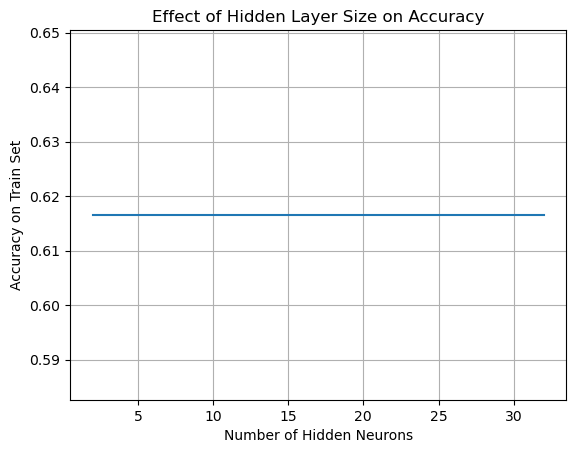

In [23]:
import matplotlib.pyplot as plt

hidden_sizes = [2, 4, 8, 16, 32]
accuracies = []

# فقط ستون‌های عددی رو نگه داریم
x_train_numeric = x_train.select_dtypes(include=['int64', 'float64', 'bool'])

# تبدیل به آرایه عددی
X_np = x_train_numeric.astype(float).values.T
Y_np = y_train.values.reshape(1, -1)

for h in hidden_sizes:
    W1, b1, W2, b2 = train(X_np, Y_np, hidden_size=h, learning_rate=0.01)

    _, A2 = forward_propagation(X_np, W1, b1, W2, b2)
    y_pred = (A2 > 0.5).astype(int)
    accuracy = np.mean(y_pred == Y_np)
    
    accuracies.append(accuracy)

plt.plot(hidden_sizes, accuracies)
plt.xlabel('Number of Hidden Neurons')
plt.ylabel('Accuracy on Train Set')
plt.title('Effect of Hidden Layer Size on Accuracy')
plt.grid(True)
plt.show()



Iteration 0, Cost: 0.6918
Iteration 100, Cost: 0.6912
Iteration 200, Cost: 0.6906
Iteration 300, Cost: 0.6900
Iteration 400, Cost: 0.6894
Iteration 500, Cost: 0.6887
Iteration 600, Cost: 0.6880
Iteration 700, Cost: 0.6873
Iteration 800, Cost: 0.6866
Iteration 900, Cost: 0.6858
Iteration 0, Cost: 0.6918
Iteration 100, Cost: 0.6850
Iteration 200, Cost: 0.6788
Iteration 300, Cost: 0.6742
Iteration 400, Cost: 0.6710
Iteration 500, Cost: 0.6690
Iteration 600, Cost: 0.6677
Iteration 700, Cost: 0.6668
Iteration 800, Cost: 0.6663
Iteration 900, Cost: 0.6659
Iteration 0, Cost: 0.6918
Iteration 100, Cost: 0.6657
Iteration 200, Cost: 0.6653
Iteration 300, Cost: 0.6652
Iteration 400, Cost: 0.6652
Iteration 500, Cost: 0.6653
Iteration 600, Cost: 0.6653
Iteration 700, Cost: 0.6653
Iteration 800, Cost: 0.6656
Iteration 900, Cost: 0.6658
Iteration 0, Cost: 0.6918
Iteration 100, Cost: 0.6655
Iteration 200, Cost: 0.6644
Iteration 300, Cost: 0.6628
Iteration 400, Cost: 0.6607
Iteration 500, Cost: 0.6549


/tmp/ipykernel_342/2563738033.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


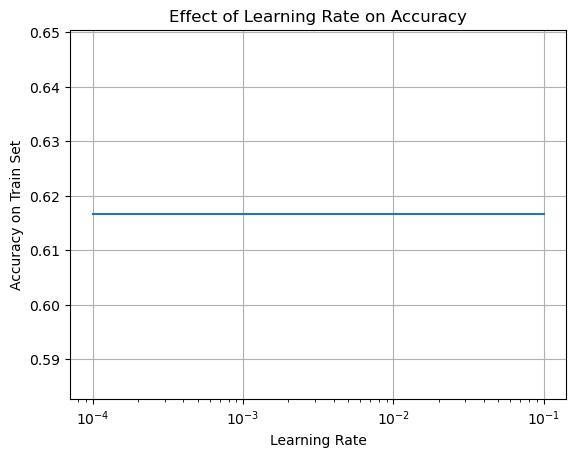

In [26]:
import matplotlib.pyplot as plt

learning_rates = [0.0001, 0.001, 0.01, 0.1]
accuracies = []

# فقط ستون‌های عددی رو نگه داریم
x_train_numeric = x_train.select_dtypes(include=['int64', 'float64', 'bool'])

# تبدیل به آرایه عددی
X_np = x_train_numeric.astype(float).values.T
Y_np = y_train.values.reshape(1, -1)

for lr in learning_rates:
    W1, b1, W2, b2 = train(X_np, Y_np, hidden_size=8, learning_rate=lr)
    
    # مرحله پیش‌بینی
    _, A2 = forward_propagation(X_np, W1, b1, W2, b2)
    y_pred = (A2 > 0.5).astype(int)
    accuracy = np.mean(y_pred == Y_np)
    
    accuracies.append(accuracy)

# رسم نمودار
plt.plot(learning_rates, accuracies)
plt.xscale('log')  # محور x به صورت لگاریتمی
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy on Train Set')
plt.title('Effect of Learning Rate on Accuracy')
plt.grid(True)
plt.show()
